<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/1_5_%EA%B3%BC%EC%A0%81%ED%95%A9_%EB%B0%A9%EC%A7%80%EA%B8%B0%EB%B2%95_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# sklearn의 KFold 모듈 불러오기
from sklearn.model_selection import KFold

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로
           분리합니다.
           
           학습용 데이터로 전체 데이터의 80%를,
           테스트용 데이터로 나머지 20%를 사용합니다.
           
           동일한 결과 확인을 위하여 random_state를
           100으로 설정합니다.
"""
def load_data():
    
    X, y = load_boston(return_X_y = True)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.2,random_state = 100)
    
    return train_X, test_X, train_y, test_y
    

"""
2. K-fold 교차 검증을 통한 
   모델 학습 및 예측 수행을 진행할 함수를 구현합니다.
   
   Step01. 전체 데이터를 5개로 분리할 수 있도록 
           KFold 객체를 정의합니다.
           
   Step02. 정의한 kFold 객체와 .split() 함수를 이용하여 
           학습용 데이터 내에서 다시 
           학습용(Train) 데이터와 검증용(Validation)
           데이터를 나누고 
           각각 X_train, X_val, y_train, y_val에
           저장합니다.
           
           train_idx 와 val_idx는 분리된 데이터들의
           인덱스입니다.
            
   Step03. 분리한 학습용 데이터로 모델을 학습시키고,
           검증용 데이터로 모델을 평가하여 
           각 데이터에 대한 모델 평가 점수를 score
           변수에 저장합니다.
"""
def kfold_regression(train_X, train_y):
    
    model = LinearRegression()
    
    # 반복문 내에서 횟수를 표시하기 위한 변수 설정하기
    n_iter = 0
    
    # 각 fold 마다 모델 검증 점수를 저장하기 위한 빈 리스트 생성하기
    model_scores = []
    
    kfold = KFold(n_splits=5)
    
    for train_idx, val_idx in kfold.split(train_X):
        
        X_train, X_val =  train_X[train_idx], train_X[val_idx]
        y_train, y_val =  train_y[train_idx], train_y[val_idx]
        
        model.fit(X_train,y_train)
        
        # 각 Iter 별 모델 평가 점수 측정
        score = model.score(X_val, y_val)
        
        # 학습용 데이터의 크기를 저장합니다.
        train_size = X_train.shape[0]
        val_size = X_val.shape[0]
    
        print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data 크기 : {3}"
              .format(n_iter, score, train_size, val_size))
    
        n_iter += 1
        
        # 전체 모델 점수를 저장하는 리스트에 추가하기
        model_scores.append(score)
        
    return kfold, model, model_scores
        
        
def main():
    
    # 학습용 데이터와 테스트 데이터 불러오기
    train_X, test_X, train_y, test_y = load_data()
    
    # KFold 교차 검증을 통한 학습 결과와 회귀 모델을 반환하는 함수 호출하기
    kfold, model, model_scores = kfold_regression(train_X, train_y)
    
    # 전체 성능 점수의 평균 점수 출력
    print("\n> 평균 검증 모델 점수 : ", np.mean(model_scores))
    
    # 테스트 데이터에 대한 모델 성능 점수 출력
    print("> 테스트 데이터 모델 점수 : ", model.score(test_X,test_y))

    
if __name__ == "__main__":
    main()


Iter : 0 Cross-Validation Accuracy : 0.622527754679733, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 1 Cross-Validation Accuracy : 0.7158099616179292, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 2 Cross-Validation Accuracy : 0.7986314390280331, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 3 Cross-Validation Accuracy : 0.6952286567450774, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 4 Cross-Validation Accuracy : 0.7006957536853016, Train Data 크기 : 324, Validation Data 크기 : 80

> 평균 검증 모델 점수 :  0.7065787131512147
> 테스트 데이터 모델 점수 :  0.7572608014205962


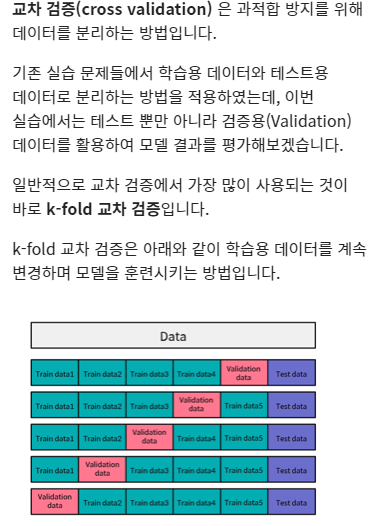

k-fold 교차 검증은 아래의 순서로 진행됨
1. K를 설정하여 훈련 데이터 셋을 K개로 나눔
2. K개 중 한개를 검증용, 나머지 K-1개는 훈련/학습 용으로 사용
3. K개 모델의 평균 성능을 확인
